In [10]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60, download_if_missing=True)

In [5]:
import matplotlib.pyplot as plt

In [11]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


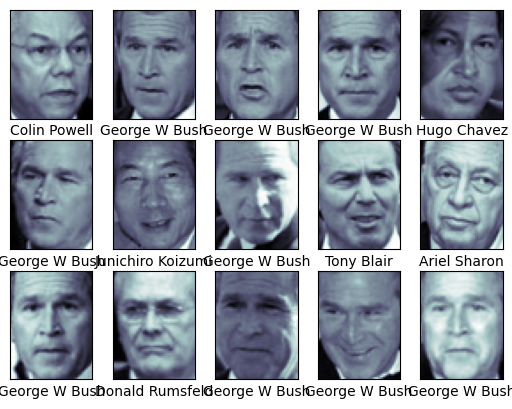

In [12]:
# Lets plot a few of this to check what we are working with
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], 
            xlabel=faces.target_names[faces.target[i]])

In [16]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [17]:
pca = PCA(n_components=150, whiten=True, random_state=42, svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [18]:
# For the sake of testing our classifier output we will split the data into a training and testing set

In [21]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [22]:
# Finally we can use a grid search cross validation to explore combinations of parameters

In [23]:
# Here we will adjust C , which controls the margin hardness, and gamma which controls the size of the radial 
# basis function kernel and determine the best model

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

In [27]:
%time grid.fit(xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 34.4 s
Wall time: 39.3 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [28]:
# Now wuth cross validation model, we can predict the labels for the test data
# which the model has not yet seen

In [29]:
model = grid.best_estimator_
yfit = model.predict(xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect labels in Red')

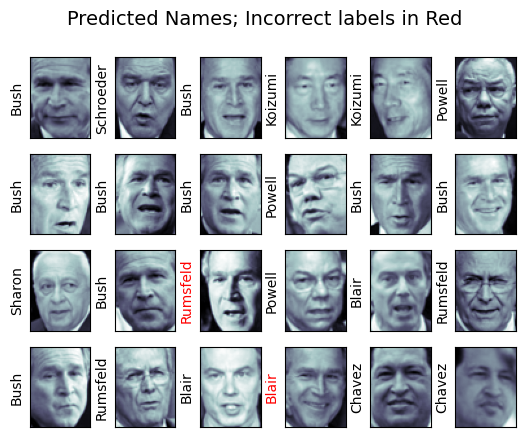

In [30]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect labels in Red', size=14)

In [31]:
# We can get a better sense of our estimators performance using the classification report
# which lists recovery statistics label by label

In [32]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



In [33]:
# We might also display the confusion matrix between these classes

In [34]:
import seaborn as sns

Text(113.92222222222219, 0.5, 'predcted label')

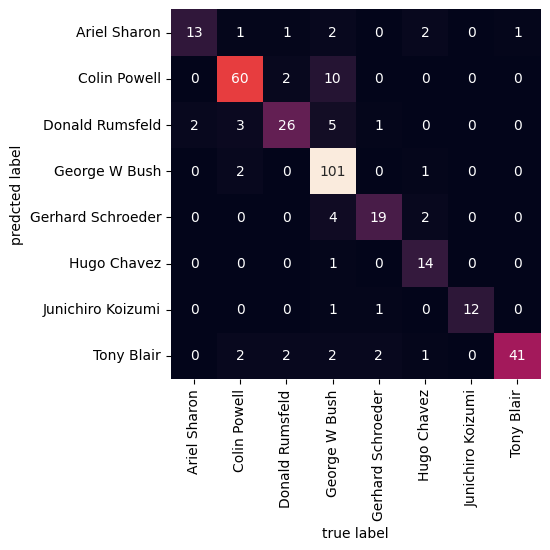

In [35]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predcted label')

In [36]:
# This helps us to get a sense of which labels are likely to get confused by the estimator